<a href="https://colab.research.google.com/github/rahulkrishnan98/ML/blob/master/Noexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [4]:
a=np.zeros((4,2))
print a.shape
b=a.reshape(2,4)
print b.shape

#standard Deviation
print np.std(a)
print np.sqrt(a)

#arange
c=np.arange(100,200,10)
c=c.reshape(5,2)
print c

#Accessing Columns
d=c[:,1]
print d

#Axis
print c.sum(axis=1)

#Identity Mat
print np.identity(3)

(4, 2)
(2, 4)
0.0
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[100 110]
 [120 130]
 [140 150]
 [160 170]
 [180 190]]
[110 130 150 170 190]
[210 250 290 330 370]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


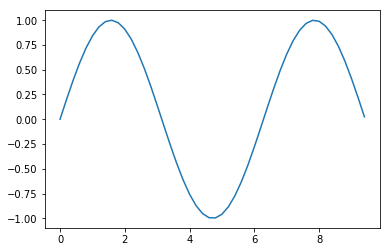

In [5]:
#Matplotlib
x=np.arange(0,3*np.pi,0.2)
y=np.sin(x)
plt.plot(x,y)
plt.show()

**KNN**

In [0]:
#KNN
df= pd.read_csv('diabetes.csv')
df.head()
X=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df['Outcome']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [8]:
#Normalization 
#Do not fit on Testing Data, use parameters fit from Train instead
scaler = StandardScaler()

scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)



/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [9]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[79 20]
 [27 28]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

   micro avg       0.69      0.69      0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



 **`Linear Regression`**

In [10]:
df=pd.read_csv('student_scores.csv')
df.sort_values(by=['Hours'],inplace=True)
df.head()

,Hours,Scores
14,1.1,17
5,1.5,20
17,1.9,24
0,2.5,21
16,2.5,30


In [0]:
def costFunc(X,y,t1,t0):
    cost1=((t1*X+t0)-y)**2
    return np.mean(cost1) * 0.5


In [12]:
costFunc(df['Hours'],df['Scores'],0.5,0.5)

1452.63515

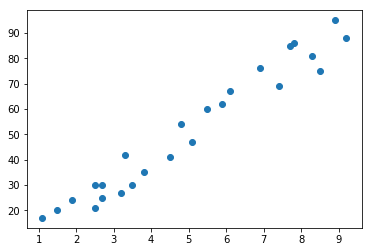

In [13]:
plt.scatter(df['Hours'],df['Scores'])

In [0]:
def gradient(max_iter,X,y,t1,t0,alpha):
    t11=[]
    cost1=[]
    t00=[]
    X = X.values
    y = y.values
    for i in range(max_iter):
        h = X*t1 + t0 
        t0_n = t0 - alpha*((h-y).mean())
        t1_n = t1 - alpha*(((h-y)*X).mean())
        
        t0 = t0_n
        t1 = t1_n
        cost1.append(costFunc(X,y,t1,t0))
        
        t11.append(t1)
        t00.append(t0)
    return t0,t1,cost1   

In [15]:
t0,t1,cost1=gradient(1500,df['Hours'],df['Scores'],0.5,0.5,0.001)
print(cost1)

[1361.9250217108438, 1276.9362725018395, 1197.3080365888206, 1122.7022091535387, 1052.802010736323, 987.3106421771081, 925.9500243936636, 868.4596176460598, 814.5953152739264, 764.1284072092576, 716.8446088638016, 672.5431512676448, 631.0359285956839, 592.1466994623441, 555.7103385932113, 521.5721356961392, 489.587138554813, 459.61953755551525, 431.5420890337669, 405.2355749923535, 380.5882968966709, 357.4956013980286, 335.8594359711101, 315.5879325788071, 296.5950175966527, 278.8000463405758, 262.12746064616476, 246.5064680455095, 231.87074117939162, 218.15813616851506, 205.31042874796847, 193.27306704453724, 181.9949399471448, 171.4281600869153, 161.5278605053824, 152.25200414748818, 143.56120537047084, 135.4185627107621, 127.78950219881342, 120.64163055656086, 113.94459765419742, 107.66996764224008, 101.79109821171137, 96.2830274697695, 91.12236795045723, 86.28720731053303, 81.75701528873576, 77.51255653342855, 73.5358089284824, 69.80988707060996, 66.31897057323003, 63.0482368924373

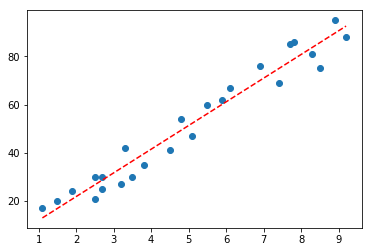

In [16]:
yy=df['Hours']*t1+t0
# print(yy)
plt.scatter(df['Hours'],df['Scores'])
plt.plot(df['Hours'],yy,'r--')

**Logistic Regression**

In [0]:
df = pd.read_csv('loan_data.csv') 

In [18]:
df.shape

(614, 13)

In [84]:
X=df.iloc[:,1:-1]
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [0]:
le = preprocessing.LabelEncoder()
le.fit(df.iloc[:,-1])
y=le.transform(df.iloc[:,-1])


In [0]:
#Convert all data to 0 and 1
for i in range(len(X)):
    if(X['Gender'].iloc[i]=='Male'):
        X['Gender'].iloc[i]=0
    else:
        X['Gender'].iloc[i]=1
for i in range(len(X)):
    if(X['Married'].iloc[i]=='No'):
        X['Married'].iloc[i]=0
    else:
        X['Married'].iloc[i]=1
for i in range(len(X)):
    if(X['Education'].iloc[i]=='Graduate'):
        X['Education'].iloc[i]=0
    else:
        X['Education'].iloc[i]=1
for i in range(len(X)):
    if(X['Self_Employed'].iloc[i]=='No'):
        X['Self_Employed'].iloc[i]=0
    else:
        X['Self_Employed'].iloc[i]=1
        

In [88]:
X=X.fillna(0)
X=X.iloc[:,:-1]
X.drop('Dependents', axis=1, inplace=True)
X #removed Dependents

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,0,0,0,5849,0.0,0.0,360.0,1.0
1,0,1,0,0,4583,1508.0,128.0,360.0,1.0
2,0,1,0,1,3000,0.0,66.0,360.0,1.0
3,0,1,1,0,2583,2358.0,120.0,360.0,1.0
4,0,0,0,0,6000,0.0,141.0,360.0,1.0
5,0,1,0,1,5417,4196.0,267.0,360.0,1.0
6,0,1,1,0,2333,1516.0,95.0,360.0,1.0
7,0,1,0,0,3036,2504.0,158.0,360.0,0.0
8,0,1,0,0,4006,1526.0,168.0,360.0,1.0
9,0,1,0,0,12841,10968.0,349.0,360.0,1.0


In [0]:
X.dropna(inplace=True)
X.fillna(0,inplace=True)

In [0]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [0]:
def cost(X,y,theta):
    theta_t=np.transpose(theta)
    h=probability(theta,X)
    m = X.shape[0]
    total_cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return total_cost

In [95]:
def gradient(max_iter,X,y,theta,alpha):
    m = X.shape[0]
    for i in range(max_iter):
        h=probability(theta,X)
        theta = theta - alpha*(X.T.dot(h-y).mean())
    return theta

theta_final=gradient(1500,X,y,np.random.rand(9),0.001)
print(theta_final)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


(422, 422)


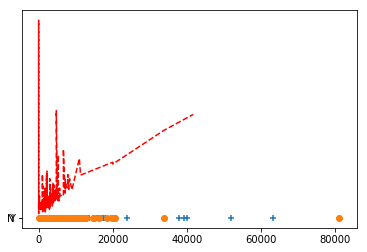

In [0]:
df.fillna(0,inplace=True)
x1=df['Loan_Status']
x2=df['ApplicantIncome']
dict1={}
x1_0=[]
y1_0=[]
x1_1=[]
y1_1=[]

for i in range(len(x1)):
    if(x1[i]=='Y'):
        x1_1.append(x1[i])
        y1_1.append(x2[i])
    else:
        x1_0.append(x1[i])
        y1_0.append(x2[i])
print(len(x1_1),len(y1_1))
plt.scatter(y1_1,x1_1, marker='+')
plt.scatter(y1_0,x1_0, marker='o')
X.sort_values(by=['CoapplicantIncome'],inplace=True)
yyy=net_input(theta_final,X)

plt.plot(X['CoapplicantIncome'],yyy,'r--')

(422, 422)


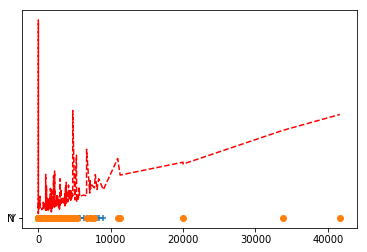

In [0]:
x1=df['Loan_Status']
x2=df['CoapplicantIncome']
dict1={}
x1_0=[]
y1_0=[]
x1_1=[]
y1_1=[]

for i in range(len(x1)):
    if(x1[i]=='Y'):
        x1_1.append(x1[i])
        y1_1.append(x2[i])
    else:
        x1_0.append(x1[i])
        y1_0.append(x2[i])
print(len(x1_1),len(y1_1))
plt.scatter(y1_1,x1_1, marker='+')
plt.scatter(y1_0,x1_0, marker='o')
X.sort_values(by=['CoapplicantIncome'],inplace)
yyy=net_input(theta_final,X)

plt.plot(X['CoapplicantIncome'],yyy,'r--')

In [104]:
#Check acc
y_pred=[]
for i in range(len(X)):
    if(net_input(theta_final,X.iloc[i,:])>0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)
print(confusion_matrix(y, y_pred))  
print(classification_report(y, y_pred))          

[[  0 192]
 [  0 422]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.69      1.00      0.81       422

   micro avg       0.69      0.69      0.69       614
   macro avg       0.34      0.50      0.41       614
weighted avg       0.47      0.69      0.56       614

